In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

In [2]:
pd.options.display.max_columns = None

In [3]:
#read data
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,Senior_Citizen,Is_Married,Dependents,tenure,Phone_Service,Dual,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#check data types 
df.dtypes

customerID            object
gender                object
Senior_Citizen         int64
Is_Married            object
Dependents            object
tenure                 int64
Phone_Service         object
Dual                  object
Internet_Service      object
Online_Security       object
Online_Backup         object
Device_Protection     object
Tech_Support          object
Streaming_TV          object
Streaming_Movies      object
Contract              object
Paperless_Billing     object
Payment_Method        object
Monthly_Charges      float64
Total_Charges         object
Churn                 object
dtype: object

In [6]:
#assert some of validation of column names and make standarlization for it 
#1-assert there are no spaces 
assert all([' ' not in col for col in df.columns.values]) , 'there are spaces in data column names'


AssertionError: there are spaces in data column names

In [7]:
#remove spaces in column names 
#standarlize name of columns to be all capitalizesd
df.columns = df.columns.map(str.capitalize).map(str.strip)

In [8]:
assert all([' ' not in col for col in df.columns.values]) , 'there are spaces in data column names'

In [9]:
df.describe(include=['object'])

,Customerid,Gender,Is_married,Dependents,Phone_service,Dual,Internet_service,Online_security,Online_backup,Device_protection,Tech_support,Streaming_tv,Streaming_movies,Contract,Paperless_billing,Payment_method,Total_charges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [10]:
#as result shown we will be do the following 
#1-convert Total charge columns to float
#2-convert object columns to categorical 
df['Total_charges'] = df['Total_charges'].astype(float , errors='ignore')

In [11]:
df['Total_charges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
#assert that it all number 
def only_numbers(val):
    try :
        _ = float(val)
        return True
    except :
        return False

non_number = [(index , val) for index , val in enumerate( df['Total_charges'].values) if not only_numbers(val)]


In [13]:
non_number

[(488, ' '),
 (753, ' '),
 (936, ' '),
 (1082, ' '),
 (1340, ' '),
 (3331, ' '),
 (3826, ' '),
 (4380, ' '),
 (5218, ' '),
 (6670, ' '),
 (6754, ' ')]

In [14]:
#we can impute it as a nan when we will reach to data processing and feature engineering stage 
df.loc[[index for index , _ in non_number] , 'Total_charges'] = np.nan

In [15]:
#assert it will be float 
assert df['Total_charges'].dtype == float

AssertionError: 

In [16]:
#convert it again to float and assert again
df['Total_charges'] = df['Total_charges'].astype(float)
assert df['Total_charges'].dtype == float

In [17]:
#convert object columns to categorical
object_columns = df.dtypes[df.dtypes == object].index
object_columns

Index(['Customerid', 'Gender', 'Is_married', 'Dependents', 'Phone_service',
       'Dual', 'Internet_service', 'Online_security', 'Online_backup',
       'Device_protection', 'Tech_support', 'Streaming_tv', 'Streaming_movies',
       'Contract', 'Paperless_billing', 'Payment_method', 'Churn'],
      dtype='object')

In [18]:
for col in object_columns:
    df[col] = df[col].astype('category')
    

In [19]:
df.dtypes

Customerid           category
Gender               category
Senior_citizen          int64
Is_married           category
Dependents           category
Tenure                  int64
Phone_service        category
Dual                 category
Internet_service     category
Online_security      category
Online_backup        category
Device_protection    category
Tech_support         category
Streaming_tv         category
Streaming_movies     category
Contract             category
Paperless_billing    category
Payment_method       category
Monthly_charges       float64
Total_charges         float64
Churn                category
dtype: object

In [20]:
df.describe(include=['number'])

,Senior_citizen,Tenure,Monthly_charges,Total_charges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df['Senior_citizen'].unique()

array([0, 1], dtype=int64)

In [22]:
#as we see senior citizien only have 0 , 1 so we can convert it to categorical dtype 
df['Senior_citizen'] = df['Senior_citizen'].astype('category')
 

In [23]:
#explore numerical features 
def visualize_numerical_dist(df , col , figsize):
    fig , (ax1 , ax2) = plt.subplots(1, 2 , figsize = figsize )
    sns.histplot(data=df , x = col , ax = ax1 )
    sns.boxplot(data=df , x = col , ax=ax2)
    plt.tight_layout(pad=20)
    plt.grid(False)
    plt.suptitle(f'Numerical visualization for {col} columns', color ='red' , fontsize =15  )

In [24]:
numeric_columns = df.dtypes[df.dtypes!='category'].index.values
numeric_columns

array(['Tenure', 'Monthly_charges', 'Total_charges'], dtype=object)

C:\Users\oscar\AppData\Local\Temp\ipykernel_9992\593910350.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=20)


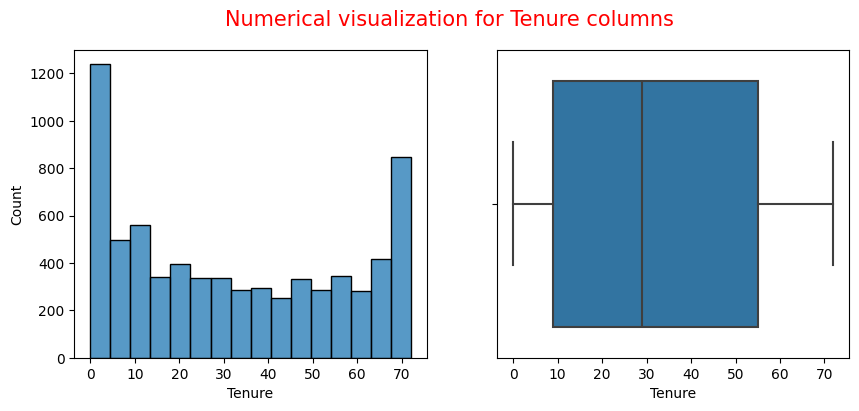

C:\Users\oscar\AppData\Local\Temp\ipykernel_9992\593910350.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=20)


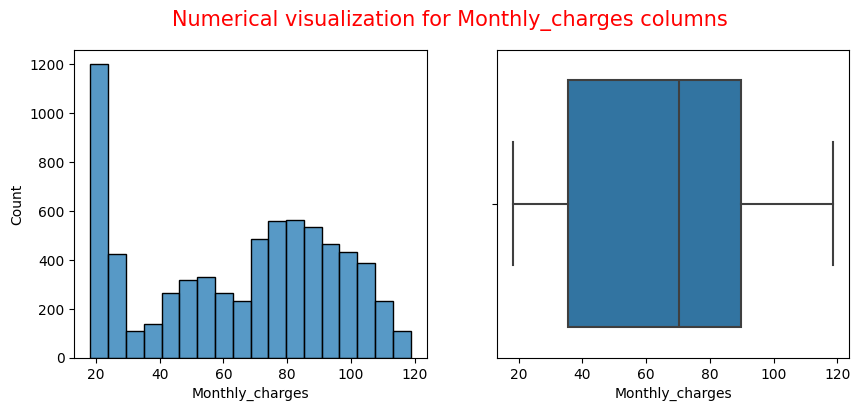

C:\Users\oscar\AppData\Local\Temp\ipykernel_9992\593910350.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=20)


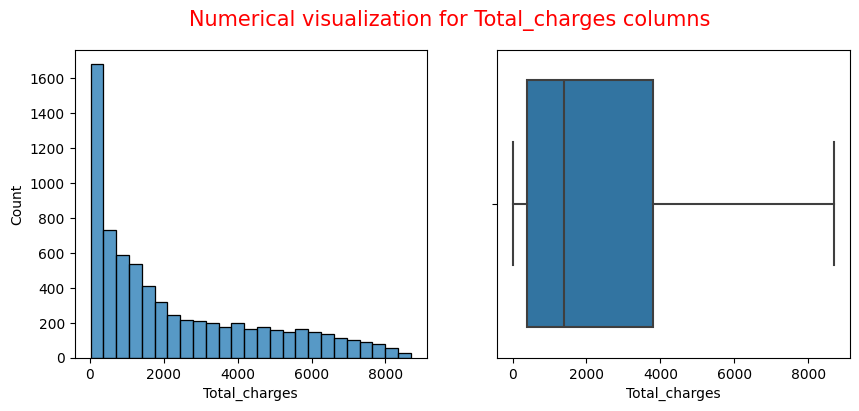

In [25]:
for col in numeric_columns:
    visualize_numerical_dist(df , col , (10, 4))
    plt.show()

In [26]:
categorical_columns = list(set(df.columns.values) - set(numeric_columns) - set(['Customerid']))
categorical_columns

['Gender',
 'Online_backup',
 'Senior_citizen',
 'Online_security',
 'Streaming_tv',
 'Streaming_movies',
 'Dependents',
 'Churn',
 'Paperless_billing',
 'Payment_method',
 'Is_married',
 'Tech_support',
 'Device_protection',
 'Contract',
 'Phone_service',
 'Internet_service',
 'Dual']

<Axes: ylabel='Dual'>

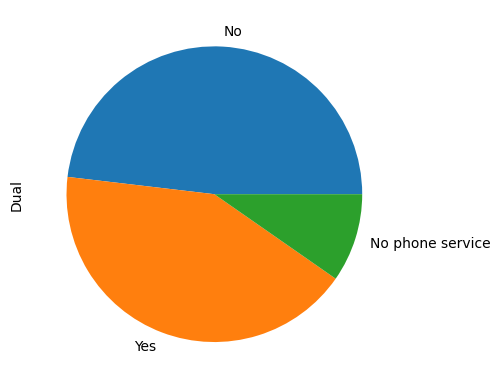

In [27]:
df['Dual'].value_counts().plot(kind='pie')

In [28]:
df['Dual'] = df['Dual'].apply(lambda x : 'No' if 'No' in x else 'Yes')
df['Dual'].value_counts()

No     4072
Yes    2971
Name: Dual, dtype: int64

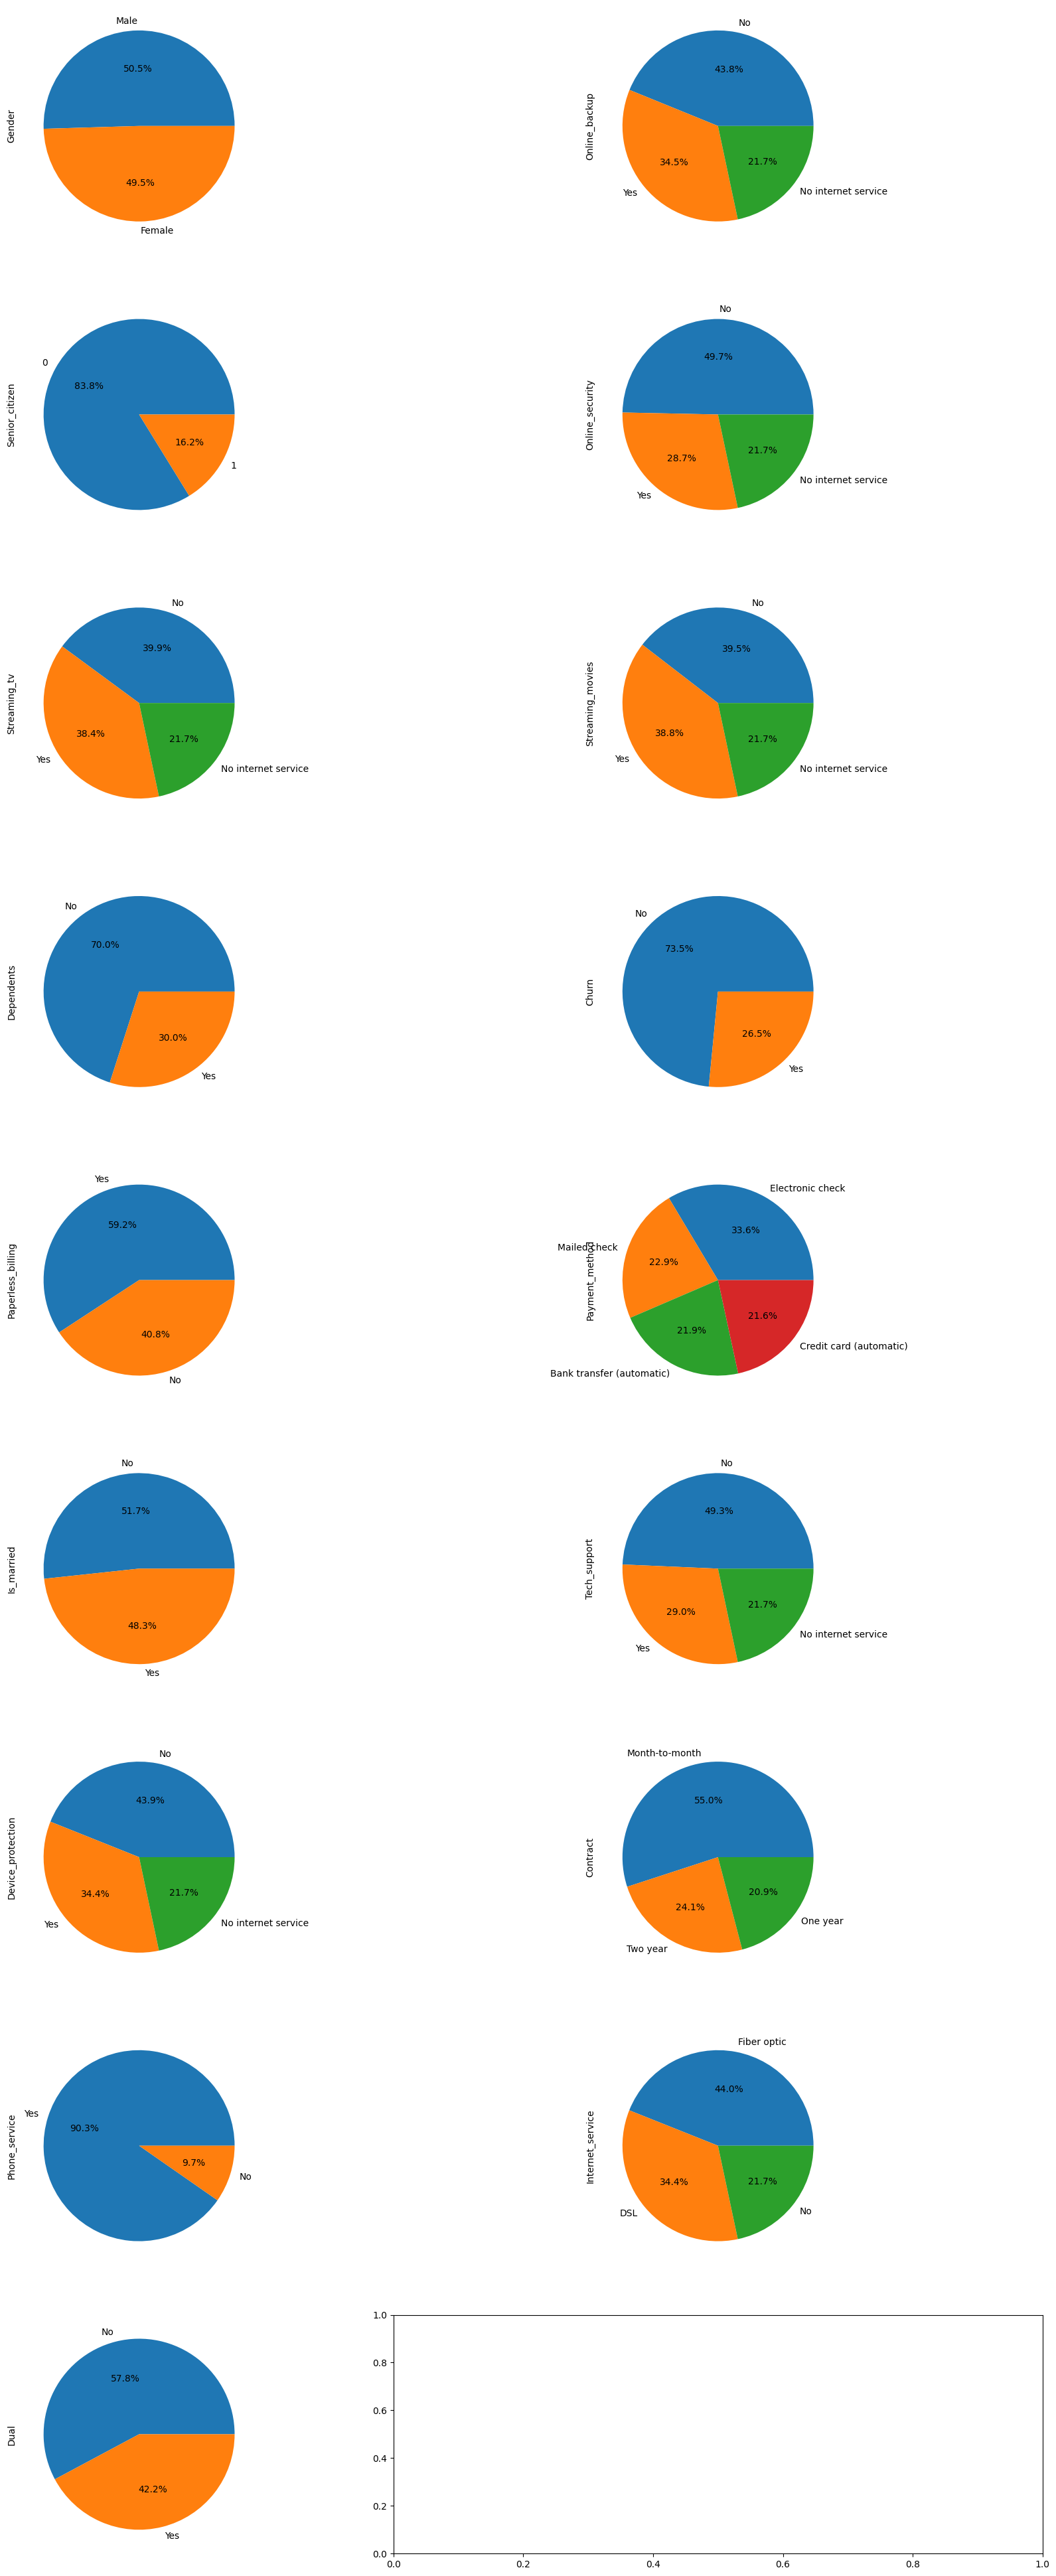

In [29]:
ncols = 2
nrows = int(len(categorical_columns) // ncols)
fig , axes = plt.subplots(nrows=nrows+1 , ncols=ncols , figsize=(20 , 40) )
axes = axes.flatten()
for i , col in enumerate(categorical_columns):
    if i < len(categorical_columns):

        df[col].value_counts().plot(kind='pie',autopct='%1.1f%%' , ax = axes[i] )
    else :
        plt.axis("off")
        axes[i].set_axis("off")
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        axes[i].set_visible(False)
    
plt.tight_layout(pad=5)
plt.show()
    

In [30]:
df.isnull().sum() / len(df)

Customerid           0.000000
Gender               0.000000
Senior_citizen       0.000000
Is_married           0.000000
Dependents           0.000000
Tenure               0.000000
Phone_service        0.000000
Dual                 0.000000
Internet_service     0.000000
Online_security      0.000000
Online_backup        0.000000
Device_protection    0.000000
Tech_support         0.000000
Streaming_tv         0.000000
Streaming_movies     0.000000
Contract             0.000000
Paperless_billing    0.000000
Payment_method       0.000000
Monthly_charges      0.000000
Total_charges        0.001562
Churn                0.000000
dtype: float64

In [31]:
#drop it it very small percantage 
print(f"shape of data before droping nulls {df.shape}")
df.dropna(inplace=True)
print(f"shape of data after droping {df.shape}")


shape of data before droping nulls (7043, 21)
shape of data after droping (7032, 21)


In [32]:
df.to_csv("../data/preb_churn_data.csv" , header=True , index=False )